In [1]:
import warnings
warnings.filterwarnings('ignore')

# Data manipulation
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy import stats

#LOOCV
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

# RF
from sklearn.ensemble import RandomForestClassifier

# Confusion matrix
import itertools
from itertools import cycle
from numpy import where

# SHAP
import shap
shap.initjs()

In [9]:
df = pd.read_csv('Feature_reduced_randomforest.csv')
df.head()

,VSAEstate8*MTPSA,MRVSA6*LabuteASA,MRVSA6*MTPSA,LabuteASA*MTPSA,EstateVSA4*LabuteASA,LabuteASA*LabuteASA,PEOEVSA6*MTPSA,slogPVSA5*LabuteASA,slogPVSA5*MTPSA,MRVSA2*LabuteASA,...,VSAEstate8*EstateVSA7,EstateVSA7*PEOEVSA6,VSAEstate8*MRVSA6,VSAEstate8*slogPVSA4,PEOEVSA6*slogPVSA1,PEOEVSA6*slogPVSA4,PEOEVSA7*VSAEstate8,MRVSA6*slogPVSA4,slogPVSA1*PEOEVSA5,Label
0,4162.571,3605.162,1963.885,11632.096,0.0,21353.385,767.595,2303.722,1254.935,4192.692,...,561.418,776.317,2670.451,967.950,161.814,178.494,986.606,456.675,1160.623,Class 0
1,2805.962,3003.259,1323.842,7841.120,0.0,17788.315,517.431,1919.102,845.944,3492.698,...,796.205,621.038,1813.155,208.880,350.458,38.518,1991.226,98.549,422.817,Class 0
2,5184.252,3114.882,2445.910,14487.133,0.0,18449.453,955.997,1990.430,1562.952,3622.511,...,930.702,465.785,2026.691,208.880,311.462,38.518,1938.048,98.549,641.933,Class 0
3,3111.978,3911.614,1468.219,8696.267,0.0,23168.500,573.861,2499.547,938.202,4549.086,...,1247.232,655.232,1729.874,449.975,521.945,82.977,2071.840,212.297,818.404,Class 0
4,5874.009,2960.123,2771.335,16414.623,0.0,17532.820,1083.191,1891.538,1770.901,3442.532,...,580.342,142.635,838.973,213.798,529.554,39.425,2299.916,100.869,181.868,Class 0


In [10]:

X = df.drop('Label', axis=1)
y = df['Label']

feat_names = X.columns
labs = y.unique()
lab_dict = {k:v for k,v in zip(range(1,97), labs)}

In [11]:
lab_dict

{1: 'Class 0',
 2: 'Class 1',
 3: 'Class 2',
 4: 'Class 3',
 5: 'Class 4',
 6: 'Class 5',
 7: 'Class 6',
 8: 'Class 7',
 9: 'Class 8',
 10: 'Class 9',
 11: 'Class 10',
 12: 'Class 11',
 13: 'Class 12',
 14: 'Class 13',
 15: 'Class 14',
 16: 'Class 15',
 17: 'Class 16',
 18: 'Class 17',
 19: 'Class 18',
 20: 'Class 19',
 21: 'Class 20',
 22: 'Class 21',
 23: 'Class 22',
 24: 'Class 23',
 25: 'Class 24',
 26: 'Class 25',
 27: 'Class 26',
 28: 'Class 27',
 29: 'Class 28',
 30: 'Class 29',
 31: 'Class 30',
 32: 'Class 31',
 33: 'Class 32',
 34: 'Class 33',
 35: 'Class 34',
 36: 'Class 35',
 37: 'Class 36',
 38: 'Class 37',
 39: 'Class 38',
 40: 'Class 39',
 41: 'Class 40',
 42: 'Class 41',
 43: 'Class 42',
 44: 'Class 43',
 45: 'Class 44',
 46: 'Class 45',
 47: 'Class 46',
 48: 'Class 50',
 49: 'Class 47',
 50: 'Class 48',
 51: 'Class 49'}

LinAlgError: singular matrix

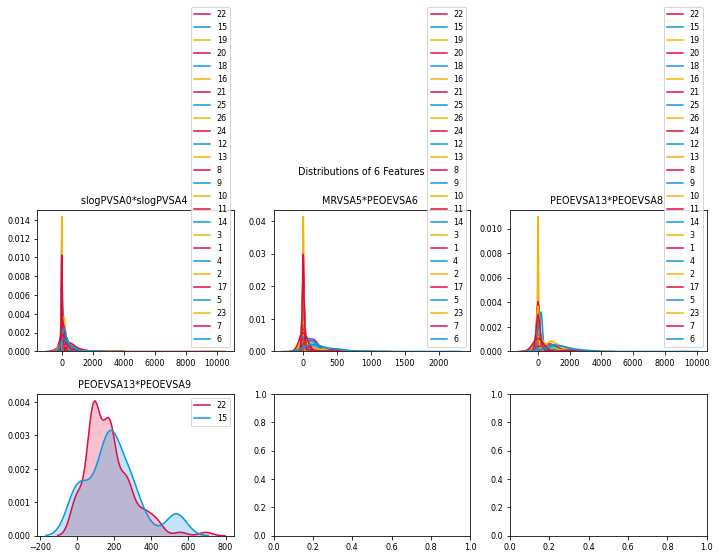

In [20]:
sns.set_palette(sns.color_palette(['#e00b41','#0b96e0','#f5b402']))

plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams.update({'font.size': 8})

fig, axes = plt.subplots(nrows=2, ncols=3)
fig.subplots_adjust(hspace=0.3)
fig.suptitle('Distributions of 6 Features')

for ax,feature,name in zip(axes.flatten(), 
                           list(df.drop(['Label'], axis = 1).columns),
                           feat_names):
    ax.set(title=name)
    for i in range(len((labs))):
        sns.kdeplot(data = df[df['Label'] == i+1][feature].values,
                    label = lab_dict[i+1],
                    shade = True,
                    ax = ax)

In [12]:
rf_mod = RandomForestClassifier(n_estimators = 500, 
                                max_depth = 5, 
                                criterion = 'gini',
                                n_jobs = -1,
                                random_state = 123)


In [13]:
rf_mod.fit(X, y)

RandomForestClassifier(max_depth=5, n_estimators=500, n_jobs=-1,
                       random_state=123)

In [14]:
explainer = shap.TreeExplainer(rf_mod)
shap_values = explainer.shap_values(X)
expected_value = explainer.expected_value

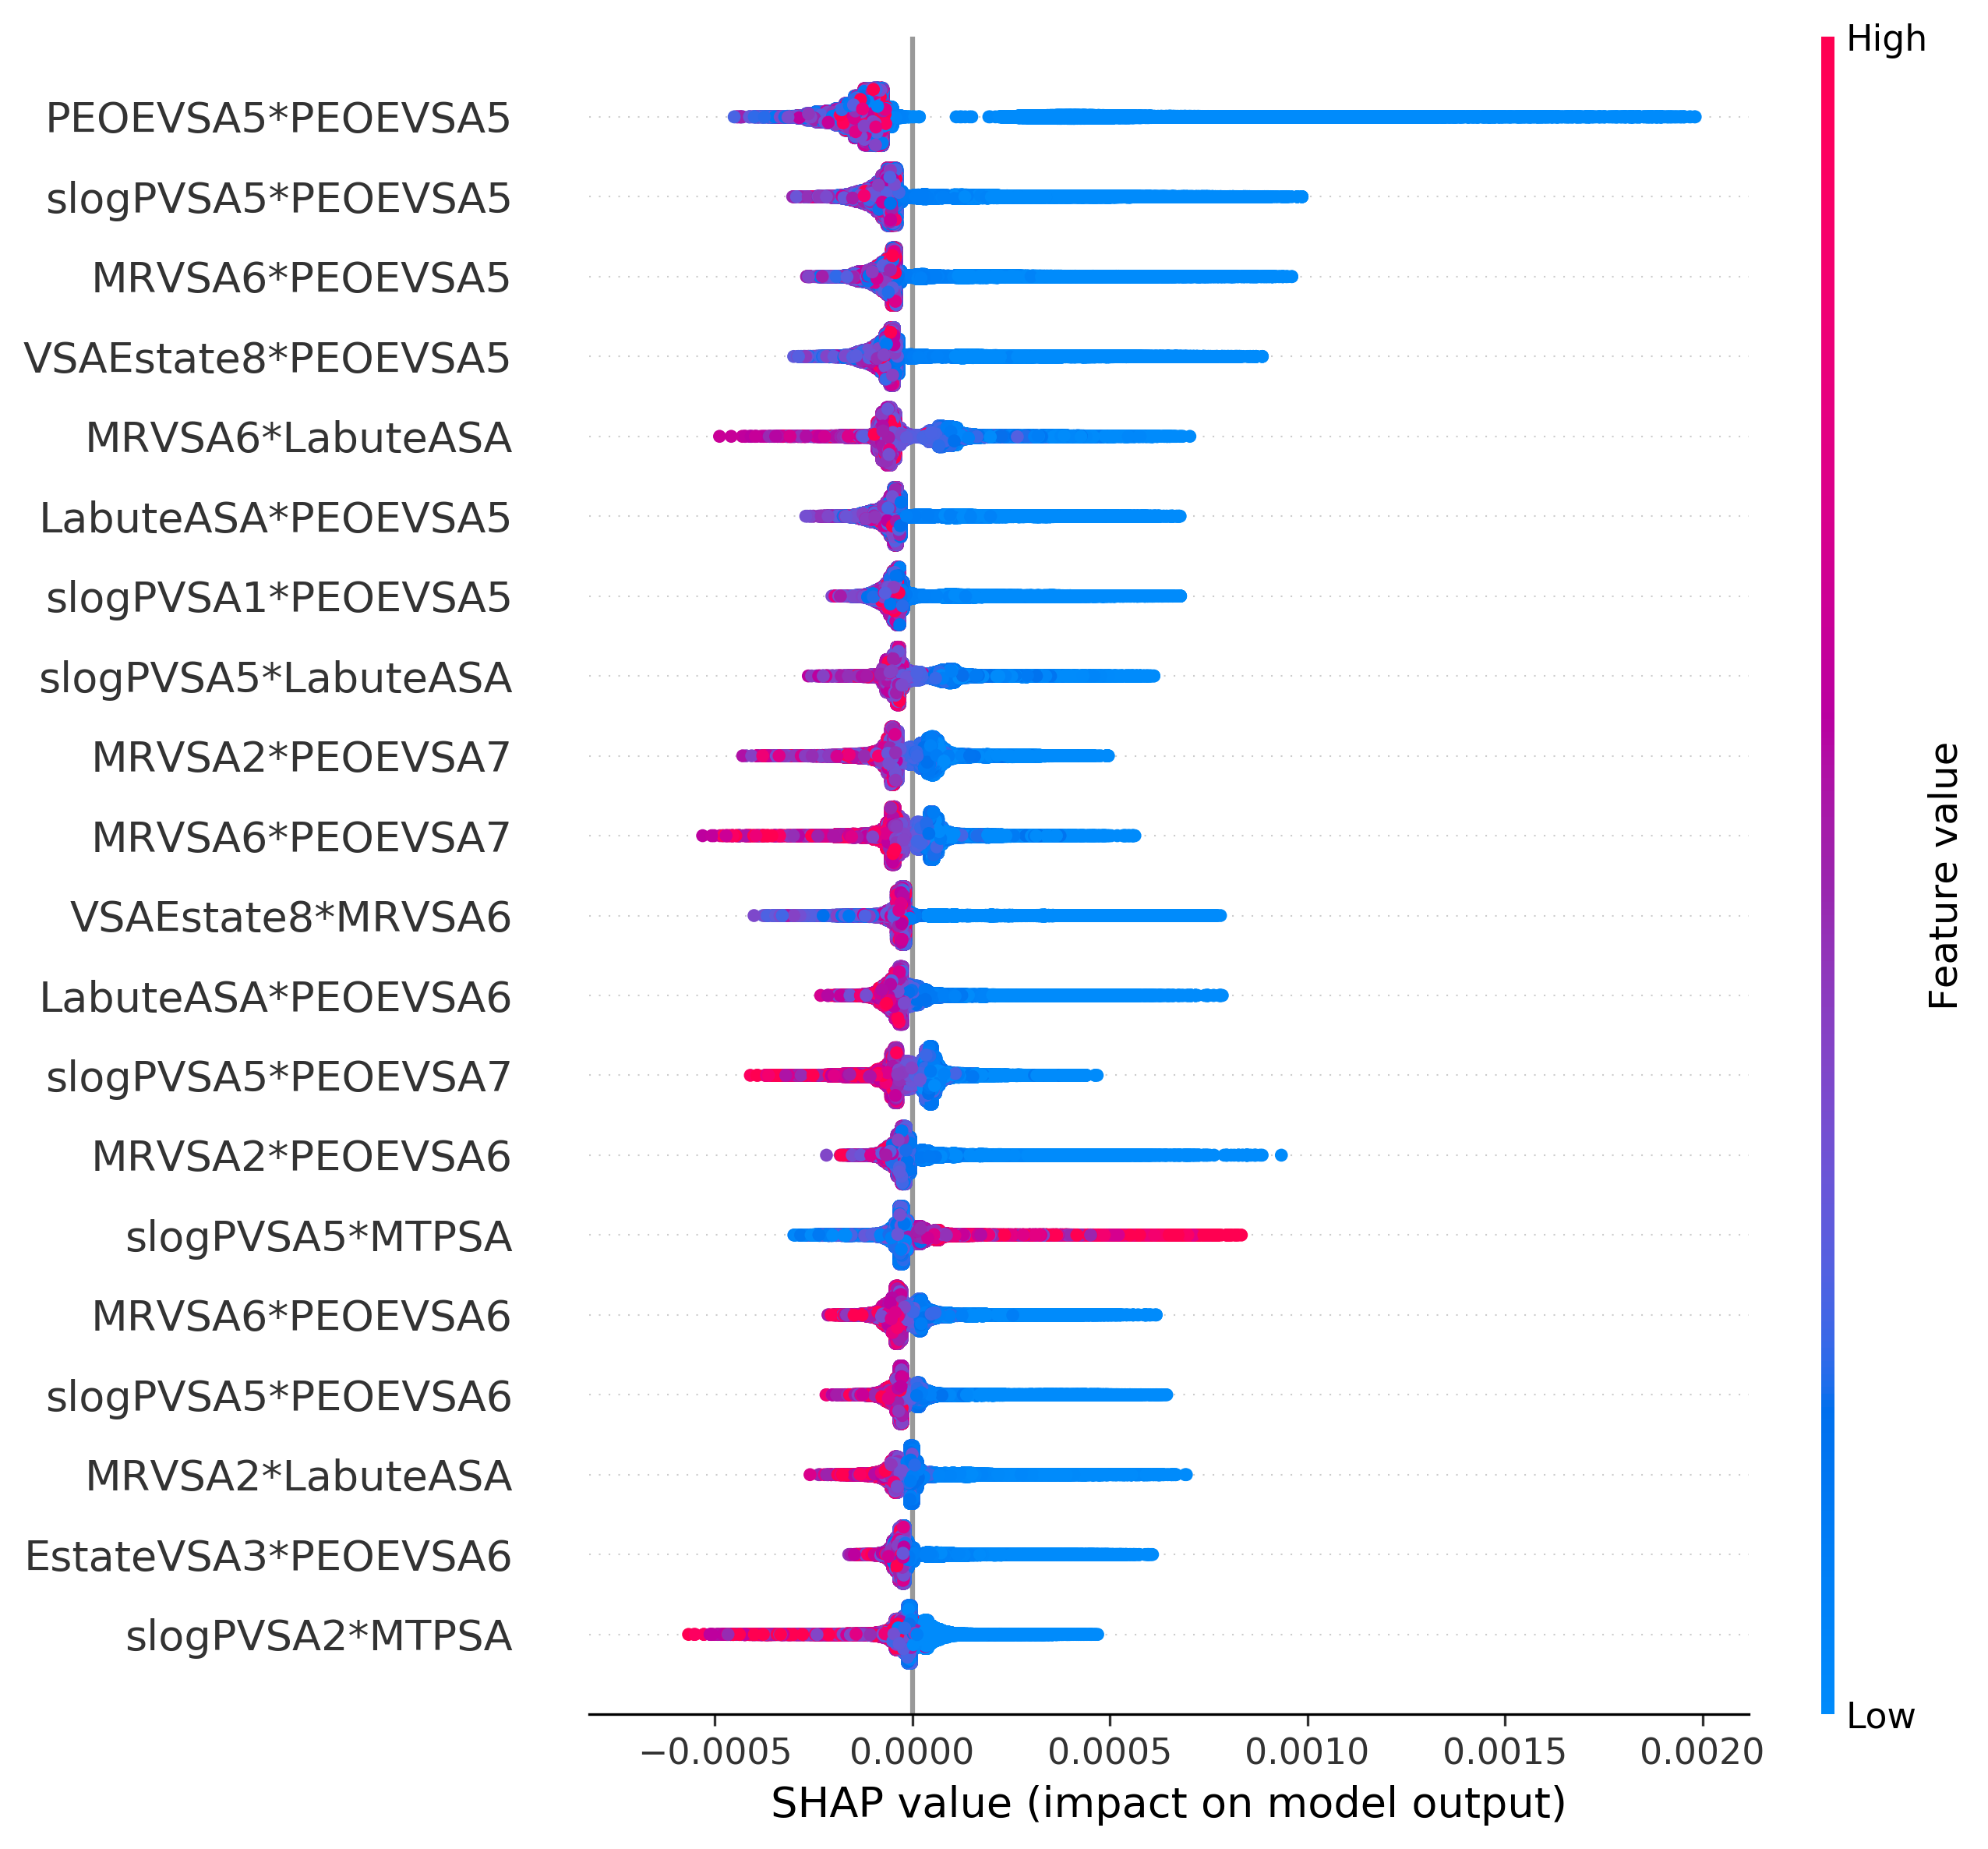

In [15]:
plt.rcParams['figure.figsize'] = [4,6]
plt.rcParams['figure.dpi']= 300

# Normal
shap.summary_plot(shap_values[1], # Class Normal (index 1 trong label list)
                  X, 
                  feature_names = feat_names,
                  # plot_type = "dot",
                  # show = True,
                  # sort = True,
                  # auto_size_plot= True,
                 color = cm.Set1)

In [31]:
X

,slogPVSA0*slogPVSA4,MRVSA5*PEOEVSA6,PEOEVSA13*PEOEVSA8,PEOEVSA13*PEOEVSA9,PEOEVSA13*PEOEVSA5,PEOEVSA13*PEOEVSA6,PEOEVSA13*PEOEVSA0,EstateVSA6*slogPVSA4,slogPVSA4*EstateVSA7,MRVSA4*MRVSA6,...,PEOEVSA13*MRVSA6,PEOEVSA13*MRVSA5,PEOEVSA12*PEOEVSA7,PEOEVSA12*PEOEVSA6,PEOEVSA12*PEOEVSA0,EstateVSA4*slogPVSA4,EstateVSA9*MRVSA2,slogPVSA4*PEOEVSA6,slogPVSA4*PEOEVSA7,Label
0,73.636,0.000,195.096,0.0,0.000,0.000,403.758,0.0,0.000,0.000,...,0.000,0.000,0.000,0.000,135.091,0.000,87.572,0.000,0.000,22
1,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.0,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,22
2,0.000,0.000,0.000,0.0,0.000,0.000,249.589,0.0,0.000,0.000,...,0.000,0.000,0.000,0.000,83.509,0.000,0.000,0.000,0.000,22
3,99.089,248.841,547.975,0.0,0.000,577.600,434.051,0.0,170.169,1522.532,...,1290.393,0.000,92.506,193.256,145.226,0.000,0.000,488.253,233.712,22
4,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.0,37.267,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5040,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.0,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,22
5041,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.0,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,22
5042,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.0,0.000,0.000,...,0.000,596.575,0.000,0.000,0.000,0.000,0.000,0.000,0.000,22
5043,0.000,0.000,0.000,0.0,255.271,585.272,2418.430,0.0,0.000,0.000,...,0.000,0.000,273.079,195.823,809.168,477.479,0.000,0.000,0.000,22


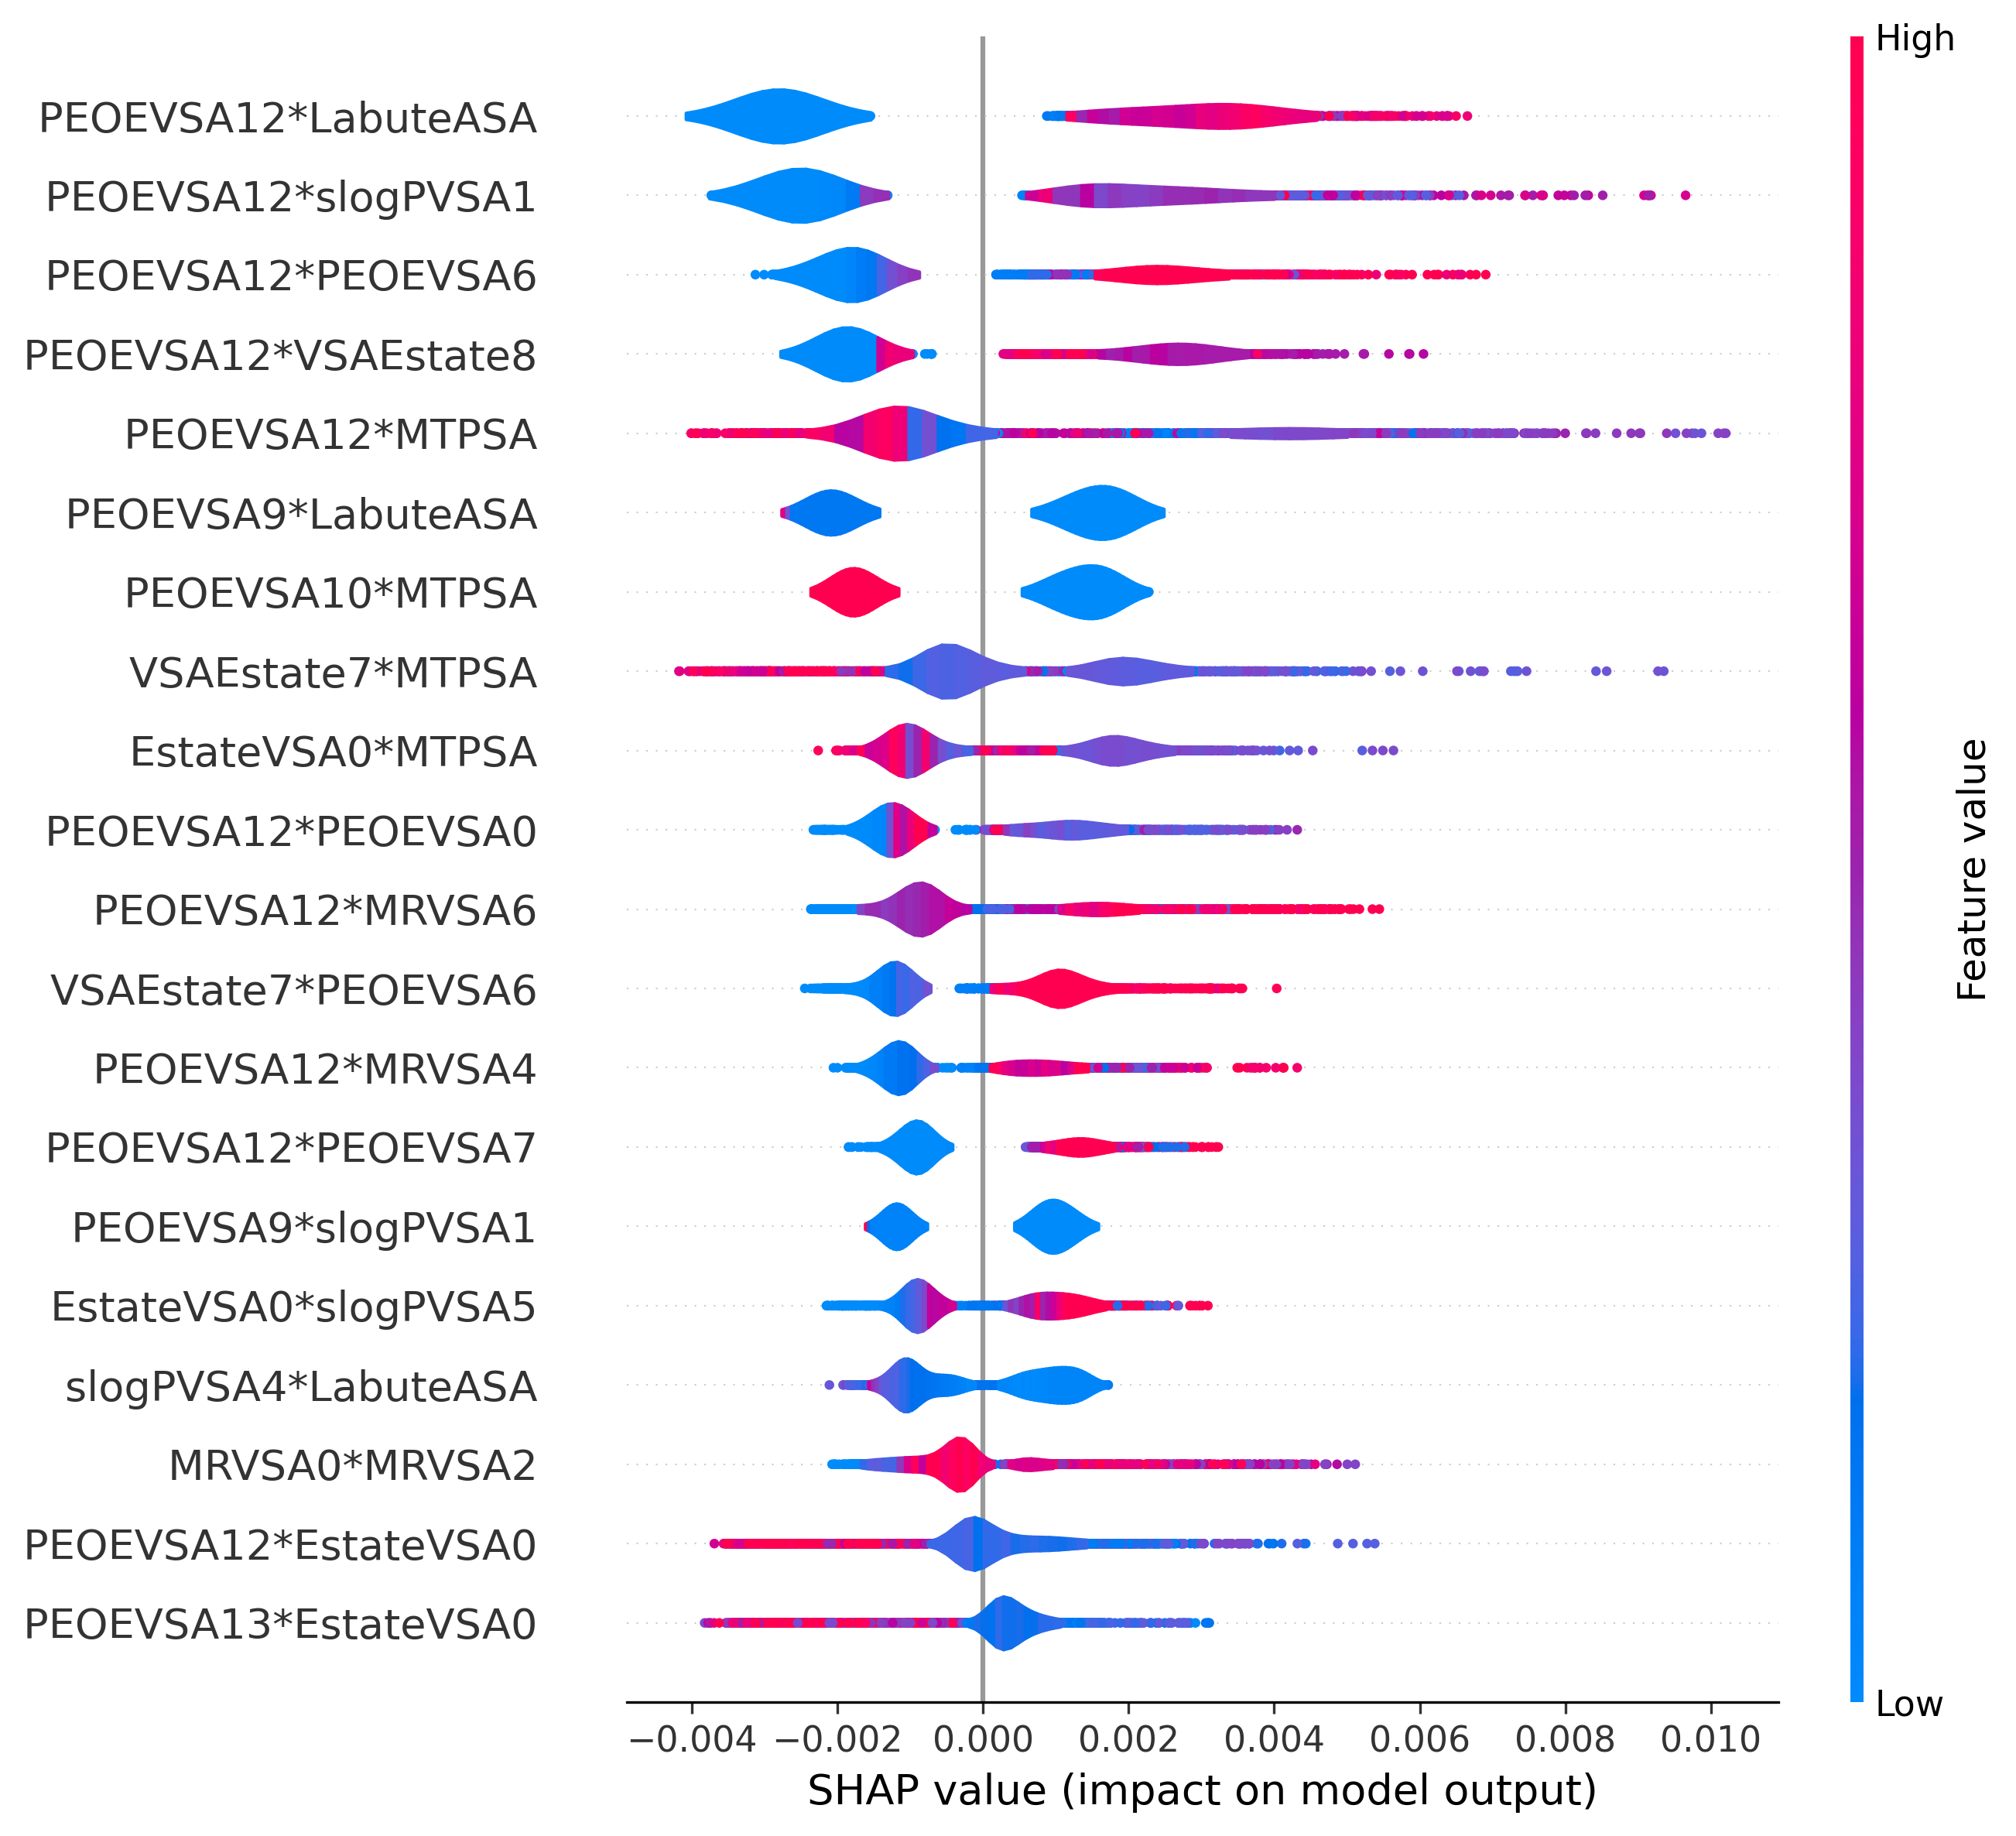

In [37]:
shap.summary_plot(shap_values[1], 
                  X, 
                  feature_names = feat_names,
                  plot_type = "violin",
                  show = True,
                  sort = True,
                  auto_size_plot= True)

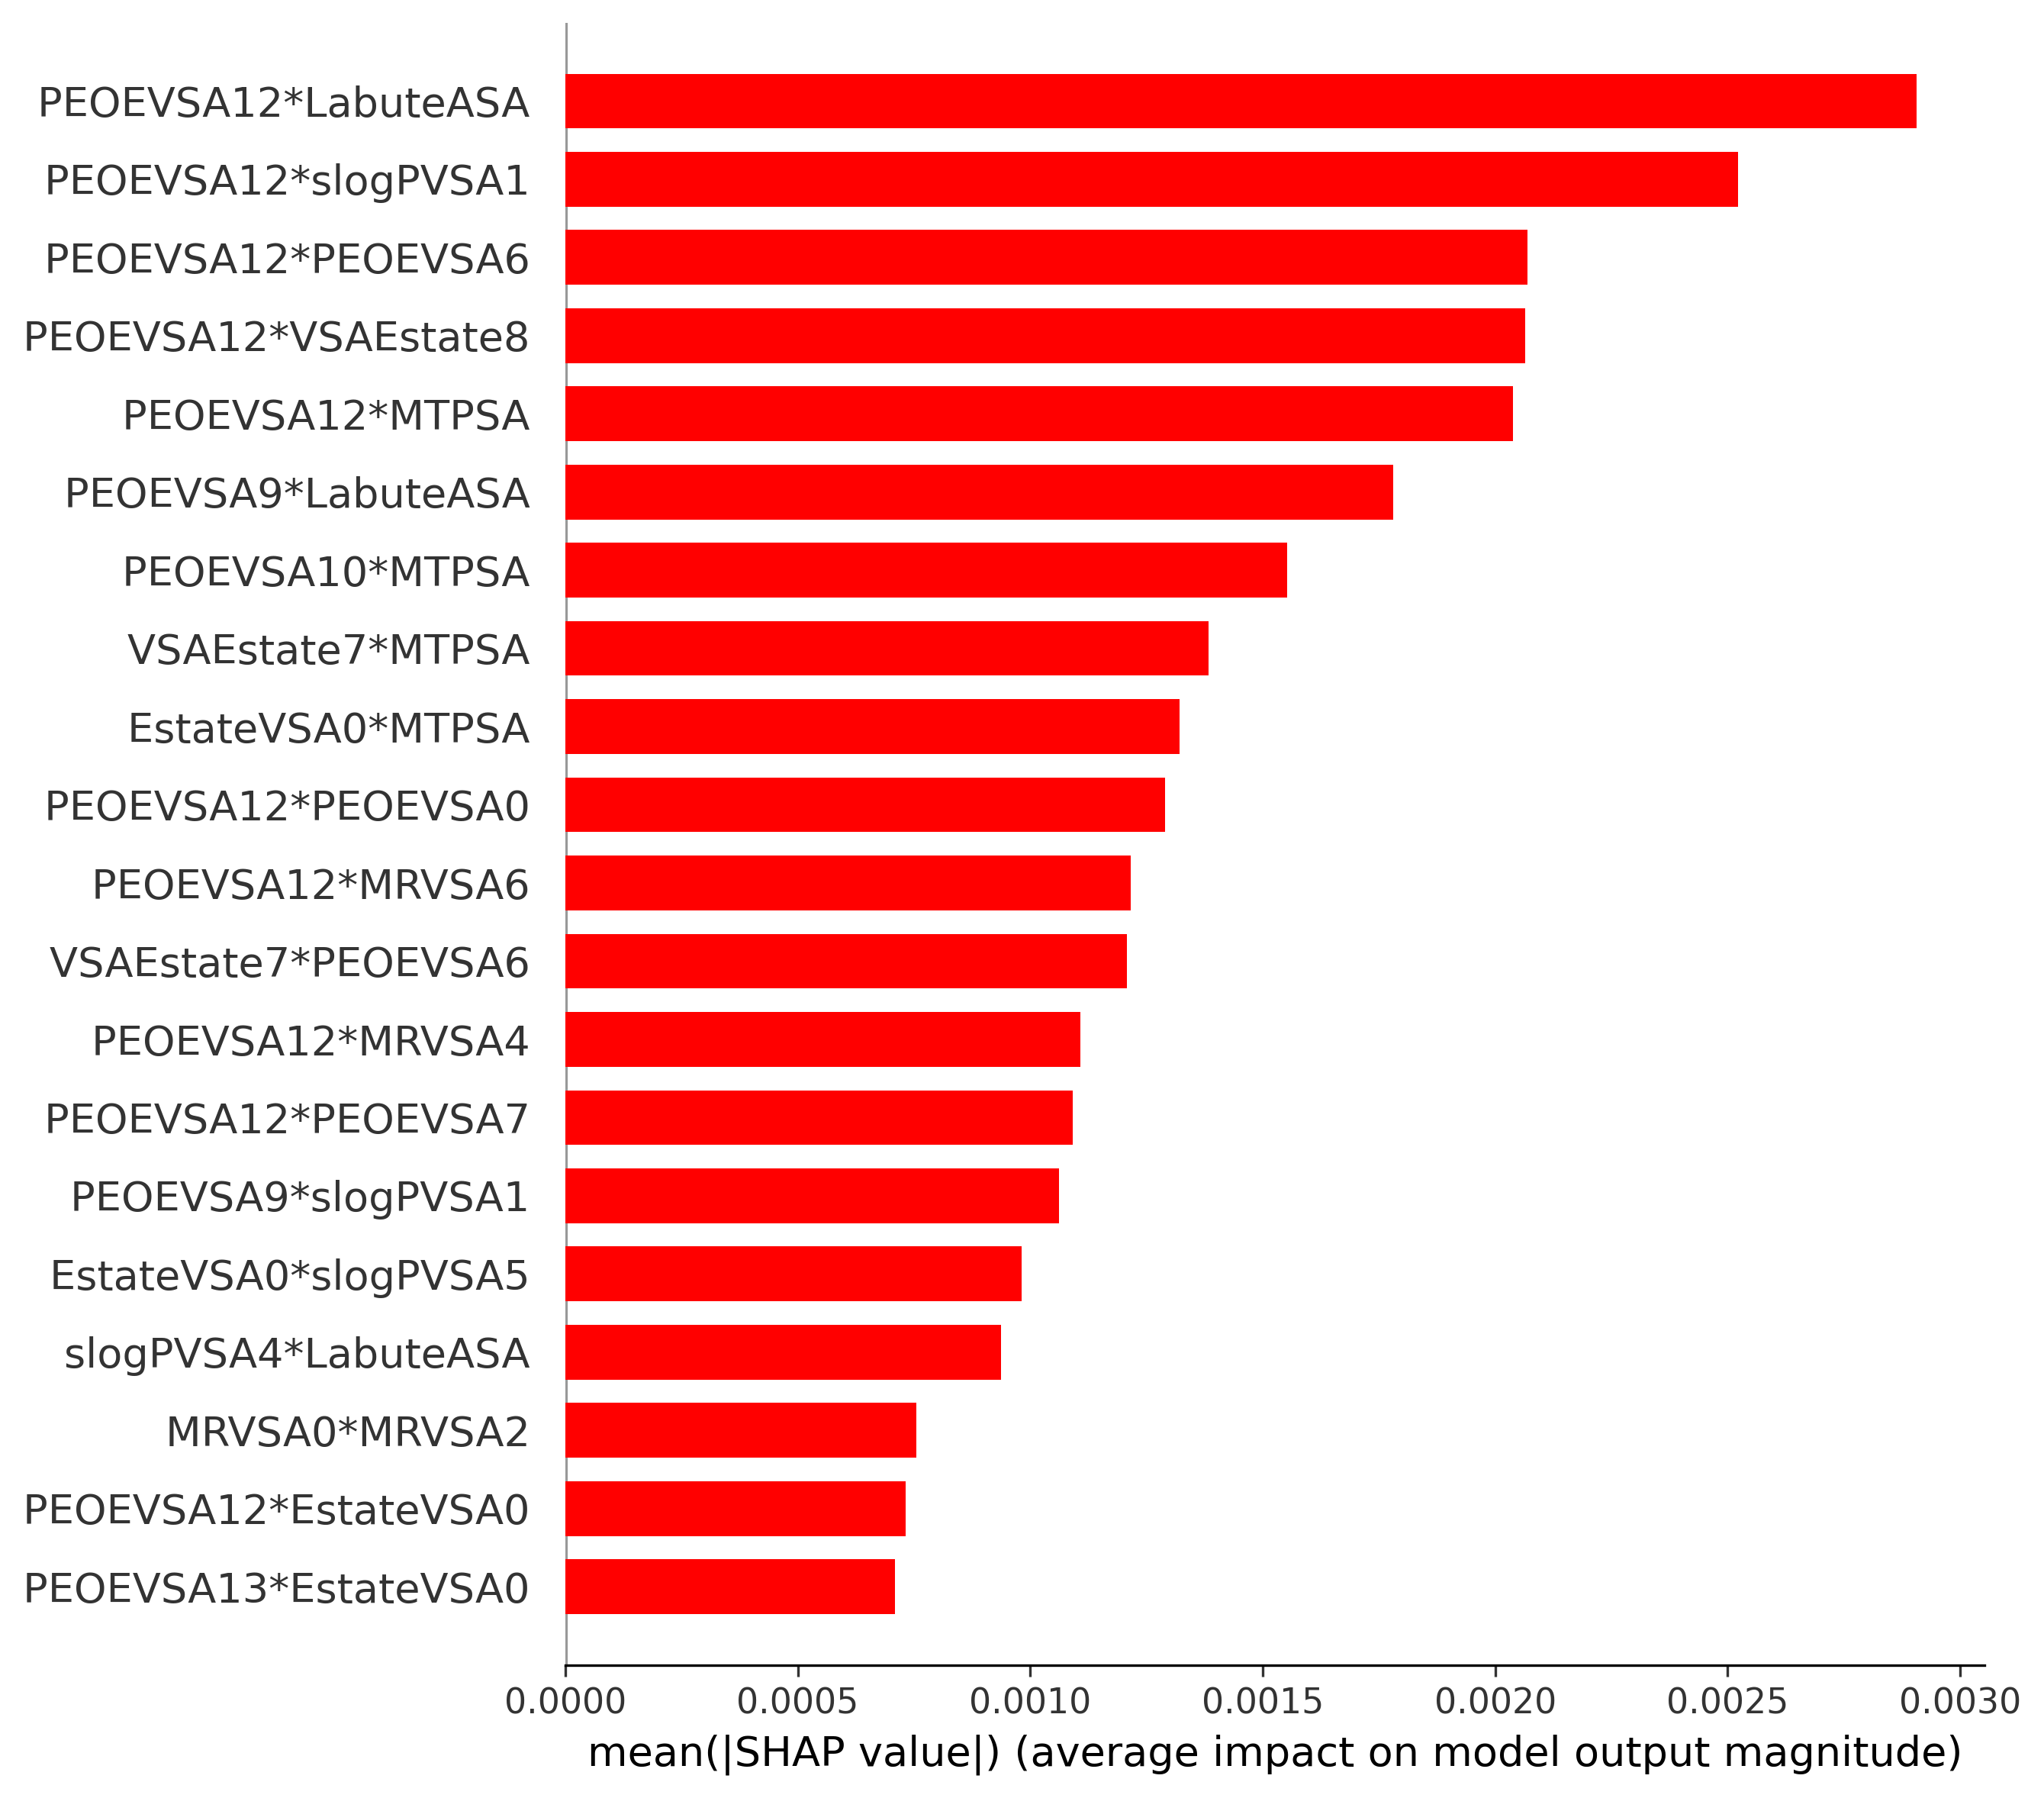

In [38]:
shap.summary_plot(shap_values[1], 
                  X, 
                  feature_names = feat_names,
                  plot_type = "bar",
                  color = 'red',
                  show = True,
                  sort = True,
                  auto_size_plot= True)

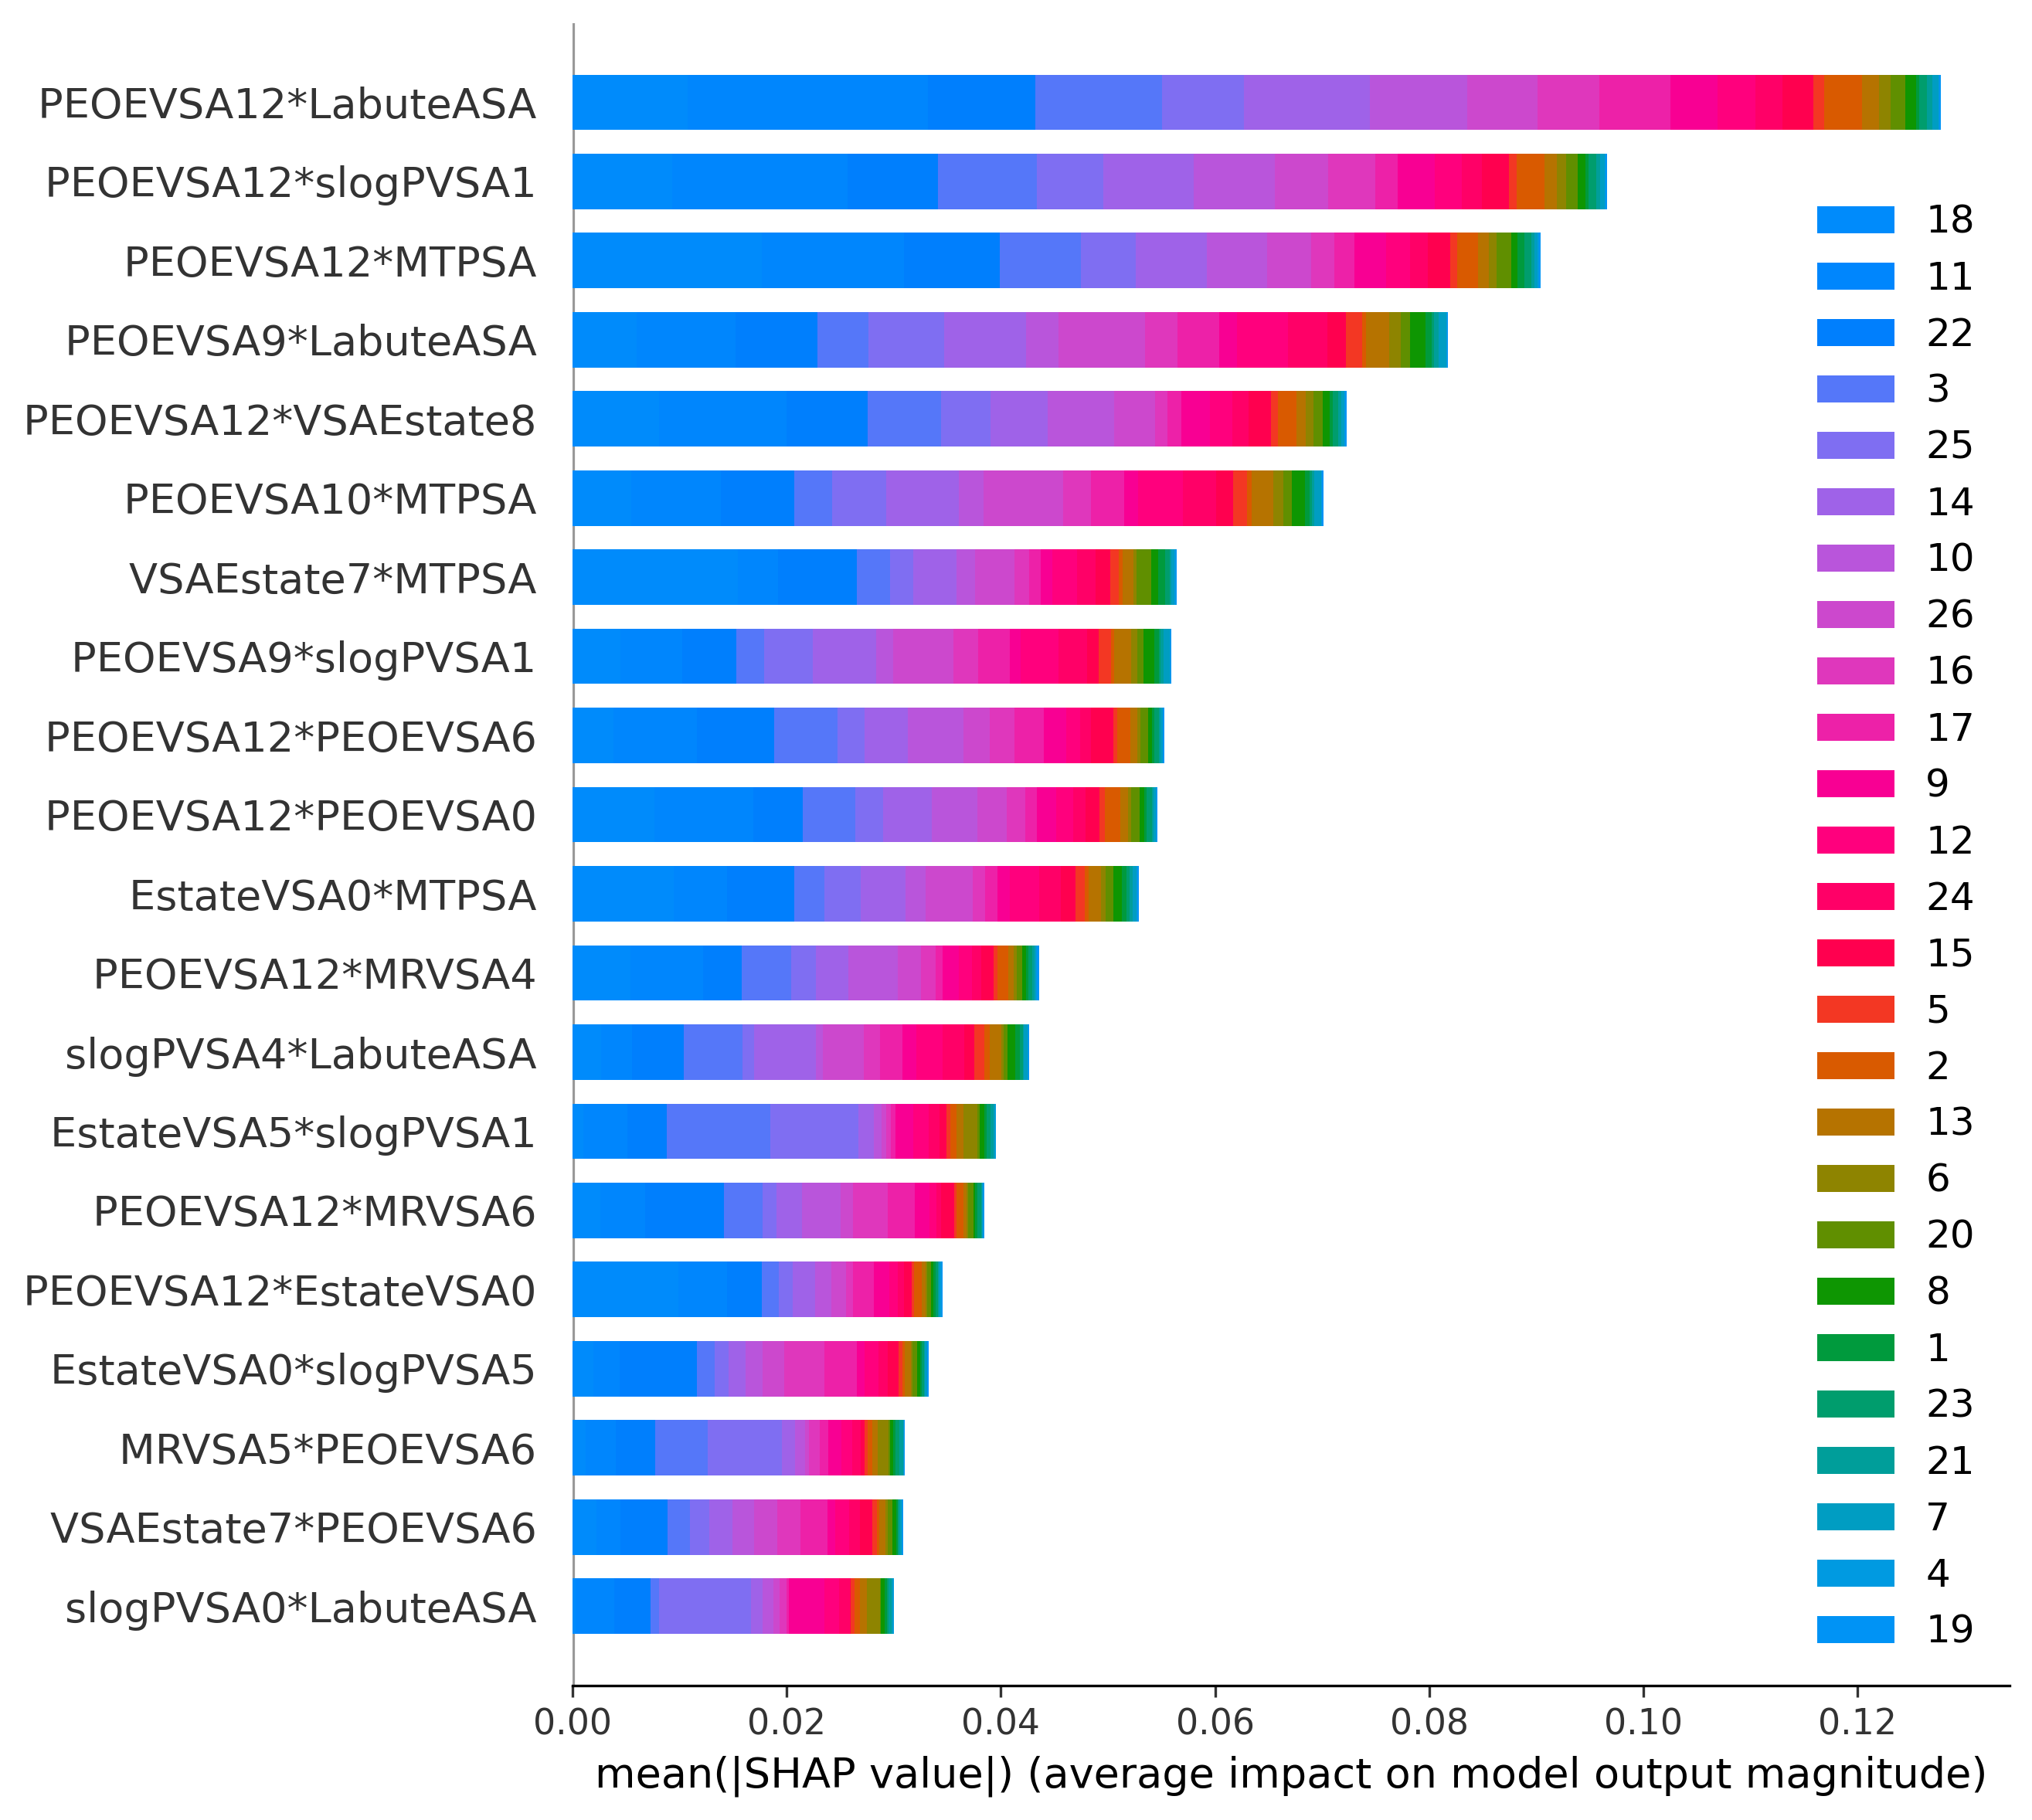

In [41]:
shap.summary_plot(shap_values, 
                  X, 
                  feature_names = feat_names,
                  plot_type = "bar",
                  show = True,
                  sort = True,
                  auto_size_plot= True,
                  class_names=labs,
                  # color = cm.Set2,
                 )

In [17]:
shap.decision_plot(base_value = expected_value[1], 
                   shap_values = shap_values[1], 
                   feature_order='hclust',
                   feature_names = feat_names,
                   features = X,
                   plot_color= cm.RdYlGn_r,
                   alpha = 0.3,
                   link='logit',
                  new_base_value = True)

TypeError: The feature_names arg requires a list or numpy array.

In [30]:
case = 5

shap.waterfall_plot(
    expected_value[1],
    shap_values[1][case],
    features=X[case],
    feature_names=feat_names,
    show=True)

KeyError: 5

In [48]:
# Train the KNN model
import sklearn
from sklearn import neighbors
n_neighbors = 15
knn = sklearn.neighbors.KNeighborsClassifier()
knn.fit(X,y)
print(knn.predict)

# knn = neighbors.KNeighborsClassifier(n_neighbors,weights='distance')
# knn.fit(X,y)
# Produce the SHAP values
# explainer = shap.KernelExplainer(knn.predict,X)
# shap_values = explainer.shap_values(X)
# expected_value = explainer.expected_value
# knn_explainer = shap.KernelExplainer(knn.predict,X)
# knn_shap_values = knn_explainer.shap_values(X)


<bound method KNeighborsClassifier.predict of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')>
